# Project Title: Deep Reinforcement Learning (DRL) กับเกม DOOM  
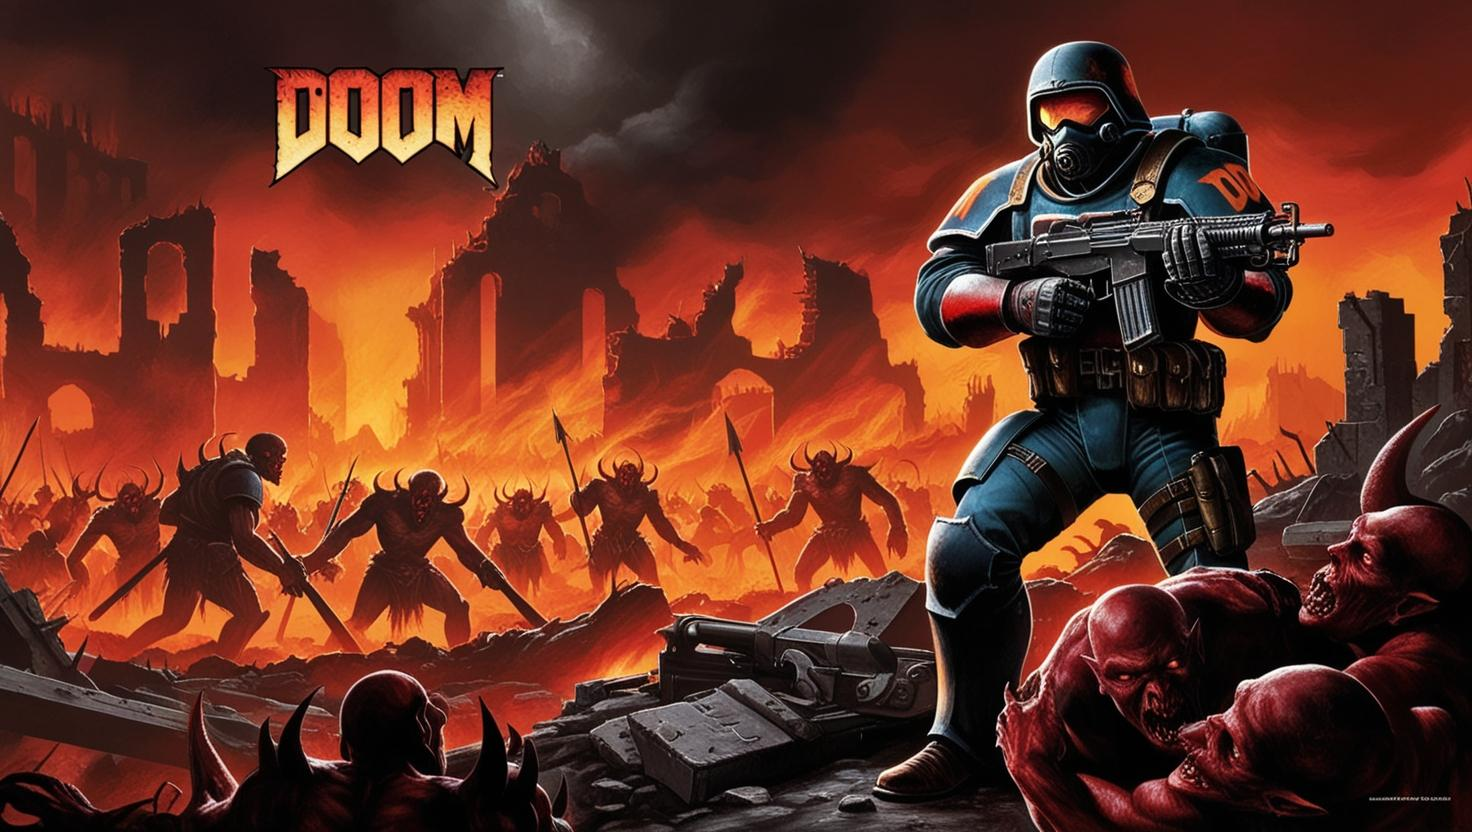

---

## Overview  
โปรเจกต์นี้มุ่งเน้นการประยุกต์ใช้ **Deep Reinforcement Learning (DRL)** เพื่อพัฒนา agent สำหรับเล่นเกม **DOOM** ผ่านการสร้างแมพแบบ grid-based environment ที่ช่วยให้การฝึกและวางแผนของ agent มีความชัดเจนและมีประสิทธิภาพ

---

## Why DOOM

ในปัจจุบัน Deep Reinforcement Learning (DRL) ถูกนำมาใช้พัฒนา AI ให้เล่นเกมหลากหลายประเภท เช่น Atari, Go และ Dota 2 โดย DRL ช่วยให้ระบบเรียนรู้และตัดสินใจในสถานการณ์ซับซ้อนได้อย่างอิสระ เกม DOOM ซึ่งเป็นเกมยิงมุมมองบุคคลที่หนึ่ง มีความท้าทายสูงในเรื่องของการตัดสินใจแบบเรียลไทม์และสภาพแวดล้อมที่เปลี่ยนแปลงรวดเร็ว จึงเป็นเกมที่เหมาะสำหรับการทดสอบประสิทธิภาพของ DRL ในการควบคุมและวางกลยุทธ์ ทำให้ DRL ในเกม DOOM ช่วยพัฒนา AI ที่สามารถรับมือกับสถานการณ์ที่เป็น FPS ได้ดียิ่งขึ้น 

---

## Motivation  
เหตุผลหลักที่เลือกเกม DOOM มีดังนี้:  
1. **มุมมองแบบ First-Person Shooter (FPS) และข้อมูลภาพเชิงมิติสูง (N-Dimensional Visual Input)**  
   - เกม DOOM มีลักษณะเป็นเกมยิงมุมมองบุคคลที่หนึ่ง ข้อมูลภาพที่ agent ต้องประมวลผลมีความซับซ้อนและหลากหลายมิติ จำเป็นต้องใช้การประมวลผลภาพที่แม่นยำและมีประสิทธิภาพสูง  
2. **ความซับซ้อนและความยืดหยุ่นของภารกิจ (Complex and Flexible Task)**  
   - DOOM มี Action Space หลากหลาย ทั้งการเคลื่อนที่ในสภาพแวดล้อมสามมิติ หมุนกล้อง ยิงปืน และอื่น ๆ  
   - ช่วยให้อัลกอริทึม Reinforcement Learning รองรับความซับซ้อนและระดับความยากที่แตกต่างกันได้ดี

---

## Literature Review  
งานวิจัยที่เกี่ยวข้องมุ่งเน้นพัฒนา agent ด้วย Deep Reinforcement Learning ในเกม DOOM โดยใช้แนวคิด **Unsupervised Auxiliary Tasks** เพื่อเพิ่มประสิทธิภาพการเรียนรู้ โดยไม่ต้องอาศัยการสอนแบบมีป้ายกำกับ (label)  

ใช้โครงสร้าง neural network ที่ประกอบด้วย convolutional layers, LSTM และ fully connected layers พร้อมการแบ่ง action space เป็น  
- **Action agent**: รับผิดชอบการยิงและการเคลื่อนไหวเชิงรุก  
- **Navigation agent**: รับผิดชอบการเดินและเก็บวัตถุในแมพ  

นอกจากนี้ยังใช้เทคนิค **reward shaping** เพื่อเร่งการเรียนรู้โดยให้รางวัลเมื่อ agent ฆ่าศัตรูหรือเก็บวัตถุ และลงโทษเมื่อ agent ถูกโจมตีหรือเสียชีวิต

---

## Knowledge: Proximal Policy Optimization (PPO)

- PPO เป็นอัลกอริทึมในกลุ่ม **on-policy methods** ที่อัปเดตนโยบาย (policy) อย่างค่อยเป็นค่อยไป  
- ใช้แนวคิด **Clipped Surrogate Objective** เพื่อป้องกันการเปลี่ยนแปลงนโยบายมากเกินไปในแต่ละขั้นตอน  
- PPO ใช้ **stochastic policy** และมี **critic** ประมาณค่ารางวัลรวมเพื่อช่วยในการอัปเดตนโยบาย  
- เหมาะสำหรับสภาพแวดล้อมซับซ้อนและ action space หลากหลาย เช่น เกม DOOM  

---

## Clipped Surrogate Objective ใน PPO

เทคนิคนี้ช่วยให้ PPO ฝึกนโยบายได้อย่างเสถียร ด้วยสมการ  

$$
L^{CLIP}(\theta) = \mathbb{E}_t \left[ \min \left( r_t(\theta) A_t, \ \text{clip}\left(r_t(\theta), 1-\epsilon, 1+\epsilon\right) A_t \right) \right]
$$

โดย  
$$
r_t(\theta) = \frac{\pi_{\theta}(a|s)}{\pi_{\theta_{\text{old}}}(a|s)}
$$

- \(A_t\): ฟังก์ชันความได้เปรียบ (advantage function)  
- \(\epsilon\): ขอบเขตจำกัดการเปลี่ยนแปลงของนโยบาย  

หลักการทำงานของ clipping:  
- เมื่อ \(A > 0\) ฟังก์ชันจะเพิ่มจนถึง \(1 + \epsilon\) แล้วหยุดไม่ให้สูงกว่านี้  
- เมื่อ \(A < 0\) ฟังก์ชันจะลดจนถึง \(1 - \epsilon\) แล้วหยุดไม่ให้ต่ำกว่านี้  

ช่วยป้องกันนโยบายใหม่เปลี่ยนแปลงเกินควร ลดความไม่เสถียรและเพิ่มประสิทธิภาพการฝึก

---

## Key Takeaways

- **Observation Space:** ใช้ภาพ RGB ขนาด 84×84×3 เป็น input หลัก  
- **Divide and Conquer:** แบ่ง action space เป็น 2 ส่วน คือ  
  - การยิงศัตรู (firing at the enemy)  
  - การเคลื่อนที่และนำทางในแมพ (navigating)  
- **Reward Terms:** กำหนดรางวัลและโทษ เช่น  
  - รางวัลการฆ่าศัตรู  
  - โทษเมื่อตาย  
  - โทษการยิงพลาด  
  - โทษการเสียสุขภาพ  

---

## Map Design & Game Porting

- โปรเจกต์นี้ทำการ port เกม DOOM ลงบนแพลตฟอร์มจาก [DOOM-style-Game](https://github.com/StanislavPetrovV/DOOM-style-Game) เพื่อใช้เป็น environment สำหรับฝึก agent  
- แมพแบบ grid-based ถูกออกแบบเพื่อศึกษาพฤติกรรมของ agent ระดับความยากง่าย และความท้าทายในสถานการณ์ต่าง ๆ  
- ช่วยสร้างกรอบการทดลองที่เหมาะสมและสามารถขยายไปใช้กับเกมอื่น ๆ ได้

---

## DRL Environment ในเกม DOOM

### 1. Observation Space
- ภาพสถานะ agent เริ่มจาก 1600×900 RGB และลดขนาดเป็น 800×450 RGB เพื่อความรวดเร็วในการประมวลผล  
- ใช้ภาพนี้เป็นข้อมูลหลักสำหรับการตัดสินใจ

### 2. Agent Status
- ค่า **Agent health** แสดงพลังชีวิต  
- ตำแหน่ง **Agent coordinate (x, y)** บนแผนที่

### 3. Action Space
- ควบคุมด้วย  
  - เมาส์ (Mouse control) สำหรับการหมุนกล้องและยิง  
  - ปุ่ม WASD สำหรับการเคลื่อนที่  
- รองรับการเคลื่อนไหวและโจมตีอย่างซับซ้อน

### 4. Reward Term
- รางวัลสำหรับการทำความเสียหายหรือฆ่าศัตรู

### 5. Termination Term
- ชนะ (Kill all enemies)  
- แพ้ (Death / Game Over)  

---

## การควบคุม Agent และศัตรู

- Agent เลือก action ที่เหมาะสมตามสถานะเพื่อบรรลุเป้าหมาย เช่น การหลบหลีก หรือโจมตี  
- ศัตรูหลากหลายชนิด เช่น SoldierNPC, CacoDemonNPC, CyberDemonNPC  
- ศัตรูมีพฤติกรรมเคลื่อนที่ ติดตาม และโจมตี agent เพื่อสร้างความท้าทาย  

---

## Features  
- สร้างแมพ grid-based จากภาพจริง  
- กำหนด mini_map ด้วย list of lists  
- ใช้ DRL ฝึก agent ให้เรียนรู้การเคลื่อนที่และวางแผน  
- แสดงผลผ่าน Jupyter Notebook  

---

## Implementation

- ทำการ **Port เกม DOOM** ลงมารันบนแพลตฟอร์มโดยใช้ไลบรารี **Pygame**  
  เพื่อสร้าง environment ที่เหมาะสมสำหรับการทดลองและพัฒนา agent ด้วย Deep Reinforcement Learning  
- ปรับแต่งเกมและสภาพแวดล้อมให้รองรับการเก็บข้อมูล state, action และ reward ที่จำเป็นต่อการฝึก agent  

จากนั้นทำการ Train ในครั้งแรกผลลัพธ์ที่ได้ออกมาดังนี้

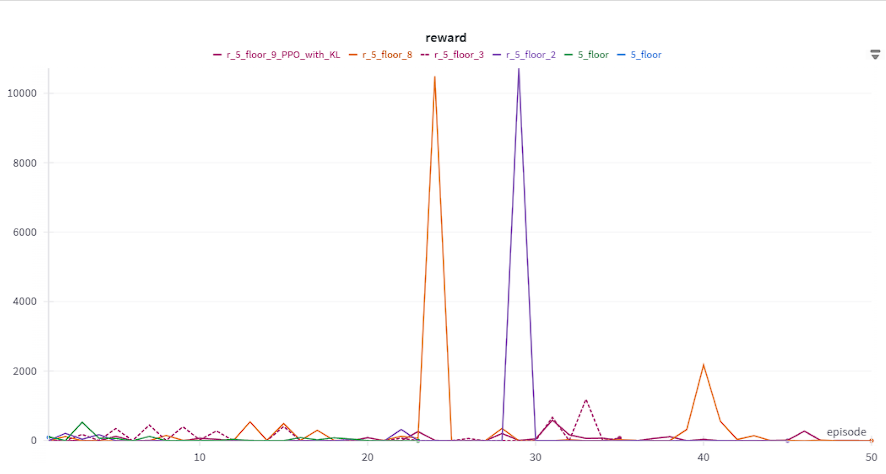

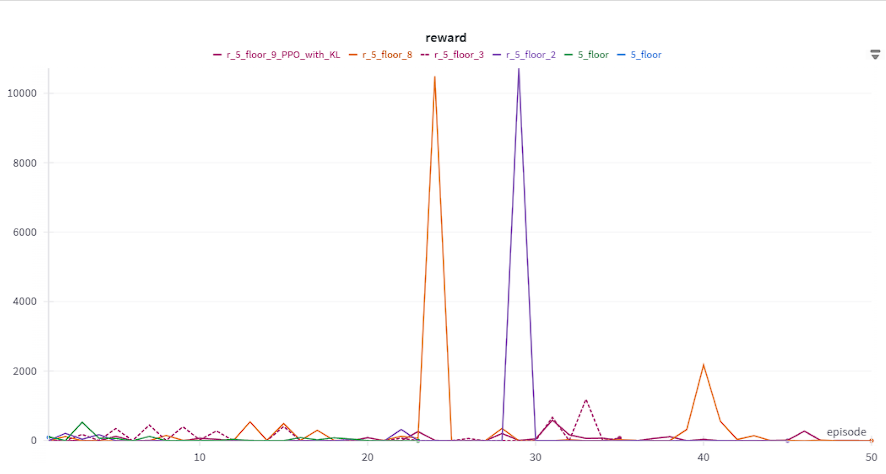

## Installation  

ติดตั้ง dependencies ผ่าน

```bash
pip install -r requirements.txt
